In [1]:
import pickle
import pandas as pd
import os
from datetime import date

In [2]:
result_dir = 'result'
source_dir = 'source'

# False Results
## load data

In [3]:
# file_name = 'false_index_decoded.pkl' # included AVAILABLE_MOBILE_PLAN in the system prompt
# file_name = 'false_index_decoded_full2024-10-16.pkl' # removed AVAILABLE_MOBILE_PLAN in the system prompt the SKT provided
# file_name = 'false_index_decoded_2024-10-16.pkl' # removed AVAILABLE_MOBILE_PLAN, mobile plans and lineups from the system prompt
file_name = 'false_index_decoded_abridged_20241017.pkl' # removed AVAILABLE_MOBILE_PLAN, mobile plans and lineups from the system prompt
file_path = os.path.join(result_dir, file_name)
with open(file_path, 'rb') as f:
    df = pickle.load(f)

df

,user_query,mismatch_type,mismatch_args,mismatch_result
150,"바꾸고 싶어서 그러는데, 다이렉트5G 69이랑 다이렉트5G 62 요금제 차이점이 뭐야?",[arguments],[],dict_keys([plans]) != dict_keys([keywords])
151,다이렉트5G 42이랑 다이렉트5G 38 요금제 분석 해줄래?,[arguments],[],dict_keys([plans]) != dict_keys([keywords])
152,뉴실버요금제와 T끼리 어르신은 다른게 뭐지?,[arguments],[],dict_keys([plans]) != dict_keys([keywords])
153,어떤게 달라 다이렉트LTE 48랑 다이렉트LTE 30,[arguments],[],dict_keys([plans]) != dict_keys([keywords])
154,band 데이터 퍼펙트와 요금제와 band 데이터 퍼펙트S 요금제는 어떻게 다른가요?,[arguments],[],dict_keys([plans]) != dict_keys([keywords])
...,...,...,...,...
593,대학생 전용 요금제 변경 가능해?,[name],None,SEARCH_MOBILE_PLAN != check_plan_availability
594,청년 대상 요금제 등록할 수 있나,[name],None,SEARCH_MOBILE_PLAN != check_plan_availability
595,온라인전용으로 가입할 수 있는 요금제 가입되나 봐줘,[name],None,SEARCH_MOBILE_PLAN != check_plan_availability
596,가족이 결합할 수 있는 요금제 가입되나 확인해줘,[name],None,SEARCH_MOBILE_PLAN != check_plan_availability


## function mismatch

In [4]:
name_mismatch = df[df['mismatch_args'].isnull()].groupby('mismatch_result').agg({'mismatch_type':'count'})
print(name_mismatch.sum())
name_mismatch

mismatch_type    43
dtype: int64


,mismatch_type
mismatch_result,
SEARCH_MOBILE_PLAN != COMPARE_CHANGE_MY_MOBILE_PLAN,6
SEARCH_MOBILE_PLAN != check_plan_availability,28
SEARCH_MOBILE_PLAN != recommend_plans,8
SEARCH_MOBILE_PLAN != remaining_data_gift,1


In [5]:
df[df['mismatch_args'].isnull()].drop('mismatch_args', axis=1)

with open(f'result/function_mismatch_details_{date.today()}.txt', 'w') as f:
    for i, group in df[df['mismatch_args'].isnull()].groupby('mismatch_result'):
        f.write(i + '\n')
        print(f'{i}')
        for row in group.itertuples():
            f_str = f'\t{row.user_query}'
            f.write(f_str + '\n')
            print(f_str)

SEARCH_MOBILE_PLAN != COMPARE_CHANGE_MY_MOBILE_PLAN
	T끼리 55 요금제로 변경해도 괜찮을까? 특장점 있으면 말해줘
	바꾸고 싶다 band 팅 3.0G으로
	연인과 과금 없이 2시간 많이 넘게 음성 전화 할 수 있는 요금제 나도 변경할래
	나 기본 제공 데이터가 100GB를 초과하는 요금 플랜으로 변경할래
	나 테더링 제한 없이 사용할 수 있는 요금 상품으로 변경할래
	바꾸고 싶다 PPS 요금제
SEARCH_MOBILE_PLAN != check_plan_availability
	0 청년 다이렉트 69 요금제 가입 가능해? 혜택도 궁금해
	0플랜 히어로 상세 내용 궁금하네, 가입은 가능할까?
	5GX 플래티넘(넷플릭스) 설명 듣고싶은데, 변경도 될라나?
	나 5G 행복누리 슬림 요금제 지금 가입할래
	나도 올인원 64 요금 상품으로다가 바로 신청할께
	마이투넘버 가입할래
	골든에이지15 신청할께
	변경가능해? PPS레귤러로
	내가 신청 할 수 있는 영상통화 한도없는 요금 플랜 안내해줘
	특정인이랑 제한없이 200분 이상 통화해도 되는 요금제 나도 가입할 수 있나?
	기본 제공 데이터가 용량 제한없는 요금 상품 알고싶어. 나 바꿔도 돼?
	나 데이터 100기가 이상 쓸 수 있는 요금제로 가입 가능할까?
	다른 폰에 연결해서 사용할건데,  내 스마트폰에서 모바일 데이터 같이 쓸 수 있는 요금제로 변경해줘
	데이터 공유 무제한인 요금제 가입할래
	매월 납부할 금액이 5만원 미만인 요금제 가입 돼?
	달마다 납부할 요금이 저렴한 요금제로 변경할 수 있어?
	내가 변경 할 수 있는 영화 혜택 있는 모바일 요금제 알려줘
	나 넘버원 요금제 지금 가입할래
	나는 뉴 T끼리 맞춤형 요금제로 지금 바로 적용하고 싶어
	band YT 나 가입할래
	LTE 커플 가입할래
	중학생 전용 요금제 가입돼?
	군인이 사용하는 요금제 가입가능해?
	대학생 전용 요금제 변경 가능해?
	청년 대상 요금제 등록할 수 있나
	온라인전용으로 가입할 수 있는 

## args mismatch

In [6]:
args_mismatch = df[~df['mismatch_args'].isnull()].copy()
args_mismatch['mismatch_type'] = args_mismatch['mismatch_type'].apply(lambda x: x[0])
args_mismatch['mismatch_arg1'] = args_mismatch['mismatch_args'].apply(lambda x: x[0] if x else 'empty response')
args_mismatch['mismatch_arg2'] = args_mismatch.apply(lambda row: row.mismatch_args[1] if len(row.mismatch_args) > 1 else row.mismatch_result, axis=1)
args_mismatch = args_mismatch.drop('mismatch_args', axis=1)
args_mismatch.head(10)

,user_query,mismatch_type,mismatch_result,mismatch_arg1,mismatch_arg2
150,"바꾸고 싶어서 그러는데, 다이렉트5G 69이랑 다이렉트5G 62 요금제 차이점이 뭐야?",arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
151,다이렉트5G 42이랑 다이렉트5G 38 요금제 분석 해줄래?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
152,뉴실버요금제와 T끼리 어르신은 다른게 뭐지?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
153,어떤게 달라 다이렉트LTE 48랑 다이렉트LTE 30,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
154,band 데이터 퍼펙트와 요금제와 band 데이터 퍼펙트S 요금제는 어떻게 다른가요?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
155,band 데이터 1.2G와 요금 체계와 band 데이터 2.2G 요금 체계를 구별 ...,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
156,0플랜 히어로랑 0플랜 슈퍼히어로 요금제의 세부 사항 어떻게 다른거지?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
157,요금제중 T플랜 세이브+다이렉트플랜과 T플랜 안심2.5G+다이렉트플랜의 차이는 어떤걸까?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
158,요금제 팅프리존24요금과 팅프리존19요금의 차이는?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])
159,팅500요금제과 팅100요금제의 차이점은?,arguments,dict_keys([plans]) != dict_keys([keywords]),empty response,dict_keys([plans]) != dict_keys([keywords])


### keyword detection from user query
- This result is not inaccurate response, but it is rather for your reference in detail

In [7]:
keywords_mismatch = args_mismatch.query("not mismatch_arg2.str.contains('dict')").copy()
print('total: ', len(keywords_mismatch))
keywords_mismatch.query("not mismatch_arg2.str.contains('dict')").groupby(['mismatch_arg1','mismatch_arg2']).agg({'user_query':'count'}).sort_values('user_query', ascending=False)

total:  46


user_query
mismatch_arg1 mismatch_arg2                                  
keywords      includedVoiceCall                             5
              monthlyPrice                                  5
              onboardingChannel                             5
              optionData                                    5
              includedDataForSharingAndTethering            4
              includedVoiceCallTospecifiedNumbers           4
              maximumAmountForSharing                       4
              benefit                                       3
              includedVideoOrValueAddedCall                 3
              onboardingDeviceAlias                         3
              availableAmountForDataOptionRefill            2
              includedText                                  2
              onboardingDevice                              1

In [8]:
keywords_mismatch[['user_query', 'mismatch_result','mismatch_arg2']]

,user_query,mismatch_result,mismatch_arg2
194,전화 50분으론 택도 없네.나 음성 75분 이상 제공되는 요금제 찾고 싶어,75분 != 75분 이상,includedVoiceCall
205,영상통화 공짜로 300분 정도 주는 요금 상품 뭐야?,300분 정도 != 300분,includedVideoOrValueAddedCall
207,영상통화 모자라지 않게 제공되는 요금제 이용하고 싶은데 안내해줘,모자르지 않게 != 모자라지 않게,includedVideoOrValueAddedCall
211,내가 어머니랑 음성 전화 무료로 할 수 있는 요금제 가르쳐줘,무료로 != 무료,includedVoiceCallTospecifiedNumbers
213,어머니랑 제한없이 200분 이상 통화해도 되는 요금제 뭐 있어?,200분 이상 != 제한없이 200분 이상,includedVoiceCallTospecifiedNumbers
237,테더링 용량을 제한 없이 써도 문제 없는 요금 상품 제공해줘,무한 != 제한 없이,includedDataForSharingAndTethering
239,다른 핸드폰이랑 페어링해서 모바일 데이터 이용하려는데 제공량 큰 요금 상품 가르쳐줘,큰 != 제공량 큰,includedDataForSharingAndTethering
243,데이터 공유가 제한없이 가능한 요금 상품 찾고 있는데 말해줘,제한없이 != 무제한,includedDataForSharingAndTethering
249,데이터 쉐어 충분한거,충분 != 충분한,includedDataForSharingAndTethering
255,주말용 데이터가 나오는 요금제 말해줘,!= 주말용,optionData


### keywords mismatch

In [92]:
import re

args_mismatch_dict = args_mismatch.query("mismatch_result.str.contains('dict', case=False)").copy()
args_mismatch_dict['mismatch_arg2'] = args_mismatch_dict.apply(
    lambda row: re.sub(r'dict_keys|\(|\)', '', row.mismatch_arg2) if pd.notnull(row.mismatch_arg2) else row.mismatch_arg2, 
    axis=1
)
# print(args_mismatch_dict.columns)
print('total:', args_mismatch_dict['mismatch_result'].count())

args_mismatch_keys = args_mismatch_dict.groupby(['mismatch_type','mismatch_arg2']).agg({'user_query':'count'})
args_mismatch_keys

total: 58


user_query
mismatch_type mismatch_arg2                                                 
arguments     [benefit] != [availableAmountForDataOptionRefill]            1
              [includedDataForSharingAndTethering] != [includ...           1
              [includedDataForSharingAndTethering] != [maximu...          11
              [includedDataForSharingAndTethering] != [onboar...           1
              [includedData] != [maximumAmountForSharing]                  1
              [lineup] != [includedVoiceCall]                              1
              [lineup] != [productName]                                    9
              [maximumAmountForSharing] != [includedData]                  2
              [onboardingDevice] != [specialCustomerOnboard]               1
              [onboardingTypeEligibility] != [onboardingChann...           2
              [onboardingTypeEligibility] != [onboardingTypeE...           6
              [optionData] != [includedData, optionData]                   1
              [optionData] != [includedData]                               1
              [plan] != [keywords]                                        10
              [plans] != [keywords]                                       10

In [109]:
args_mismatch_dict = args_mismatch_dict[['user_query','mismatch_arg2', 'mismatch_type']]

# display
with open(f'result/argments_keyword_mismatch_detail_{date.today()}.txt', 'w') as f:
    for i, group in args_mismatch_dict.groupby(['mismatch_arg2']):
        t_str = f"{group['mismatch_arg2'].unique()[0]}"
        f.write(t_str + '\n')
        print(t_str)
        for row in group.itertuples():
            t_str = f'\t{row.user_query}'
            f.write(t_str + '\n')
            print(t_str)

 [benefit] != [availableAmountForDataOptionRefill]
	리필 혜택 요금플랜 가입할게
 [includedDataForSharingAndTethering] != [includedData]
	데이터 많이 줄 수 있는거 가입하려고 해
 [includedDataForSharingAndTethering] != [maximumAmountForSharing]
	가족끼리 데이터 공유할 수 있는 요금제  찾고 있는데 알려줘
	가족끼리 데이터 주고 받을 수 있는 요금 상품 보고 있는데 뭐가있어?
	데이터 쉐어를 제한없이 할 수 있는 요금 상품이 뭐야?
	많이 데이터 공유 가능한게 뭐가 있어?
	노트북에 핫스팟해서 데이터 쓸거야.  내 폰에서 데이터 줄 수 있는 요금제 가입할래
	내가 가입할 수 있는 데이터 공유할 수 있는 요금제 알려줘
	내가 사용할 수 있는 데이터 줄 수 있는 요금 서비스 어떤거야?
	60기가 보다 많이 데이터 줄 수 있는 요금 플랜 쓰고 싶어
	나 데이터 충분하게 공유할 수 있는 요금제  가입하고 싶은데 뭐가 있어?
	나 데이터 넉넉하게 공유 되는 모바일 요금제 가입할건데 안내해줘
	데이터 꽤 보낼 수 있는거 사용하고 싶어
 [includedDataForSharingAndTethering] != [onboardingDevice, maximumAmountForSharing]
	태블릿에 연결해서 쓸거야. 내 폰에서 데이터 제공 할 수 있는 요금제 알려줘
 [includedData] != [maximumAmountForSharing]
	나에게 기본 데이터 부족함없이 나눠주는 모바일 요금제는 어떤건지 정리 좀 해줄래?
 [lineup] != [includedVoiceCall]
	나 지금 무료음성 요금제 가입할래
 [lineup] != [productName]
	나에게 5GX플랜 요금제에 대해 정보를 자세히 알려줘
	요금제 바꾸고 싶은데나한테 뉴실버 요금제의 특징을 자세하게 설명 좀 해줘
	0청년 요금제에 대한 특징을 나 알고싶어


#### shared arguments

In [51]:
import json

shared_args_file_name = 'shared_arguments.json'
shared_args_file_path = os.path.join(source_dir, shared_args_file_name)
with open(shared_args_file_path, 'r') as f:
    shared_args = json.load(f)

key_desc = shared_args['keywords']['properties']
key_desc['plan']= shared_args['plan']
key_desc['plans'] = shared_args['plans']
key_desc

{'productName': {'default': 'null',
  'description': 'name of mobile plan',
  'title': 'Productname',
  'type': 'string'},
 'includedVoiceCall': {'default': 'null',
  'description': 'The amount of voice calls provided by the plan',
  'title': 'Includedvoicecall',
  'type': 'string'},
 'includedVideoOrValueAddedCall': {'default': 'null',
  'description': 'The amount of video calls(영상통화) or added calls(부가통화) provided by the plan',
  'title': 'Includedvideoorvalueaddedcall',
  'type': 'string'},
 'includedVoiceCallTospecifiedNumbers': {'default': 'null',
  'description': 'The amount of voice calls to specified numbers (지정통화) provided by the plan',
  'title': 'Includedvoicecalltospecifiednumbers',
  'type': 'string'},
 'includedData': {'default': 'null',
  'description': 'The amount of data. Generally GB units are used.',
  'title': 'Includeddata',
  'type': 'string'},
 'includedDataForSharingAndTethering': {'default': 'null',
  'description': 'The amount of sharing and tethering data.',
 

In [110]:
arg_keys = args_mismatch_keys.reset_index()

with open(f'result/conflicted_argument_descriptions.txt', 'w') as f:
    for row in arg_keys.itertuples():
        true_key, llm_key = row.mismatch_arg2.split('!=')
        try:
            true_key_desc = key_desc[true_key.strip().strip('[]')]['description']
        except (KeyError, ValueError) as e:
            raise Exception(f"Error with key : {true_key.strip()}(where there are {len(true_key.strip())} chars)")

        t_str = f"{true_key} -> {llm_key}\n\t{true_key_desc}"
        f.write(t_str + '\n')
        print(t_str)

        llm_key = llm_key.strip().strip('[]')
        llm_key = llm_key.split(', ') if ',' in llm_key else [llm_key.strip()]

        for key in llm_key:
            if key.strip() != true_key.strip().strip('[]'):
                try:
                    llm_key_desc = key_desc[key.strip()]['description']
                except:
                    t_str = f"\tERROR: '{key.strip()}' not found in the shared arguments"
                    f.write(t_str + '\n')
                    print(t_str)
                else:
                    t_str = f"\t{llm_key_desc}"
                    f.write(t_str + '\n')
                    print(t_str)

 [benefit]  ->  [availableAmountForDataOptionRefill]
	benefits of the mobile plan
	amount of data refill
 [includedDataForSharingAndTethering]  ->  [includedData]
	The amount of sharing and tethering data.
	The amount of data. Generally GB units are used.
 [includedDataForSharingAndTethering]  ->  [maximumAmountForSharing]
	The amount of sharing and tethering data.
	The maximum amount of data that can be shared with others
 [includedDataForSharingAndTethering]  ->  [onboardingDevice, maximumAmountForSharing]
	The amount of sharing and tethering data.
	device for subscribing to the product
	The maximum amount of data that can be shared with others
 [includedData]  ->  [maximumAmountForSharing]
	The amount of data. Generally GB units are used.
	The maximum amount of data that can be shared with others
 [lineup]  ->  [includedVoiceCall]
	The name of the parent group to which the mobile plan belongs
	The amount of voice calls provided by the plan
 [lineup]  ->  [productName]
	The name of t

# Response time

In [62]:
result_file_name = 'results_full_20241017_1615.pkl'
result_file_path = os.path.join(result_dir, result_file_name)

with open(result_file_path, 'rb') as f:
    time_lapse_data = pickle.load(f)['time_lapse']

time_lapse_df = pd.DataFrame({'row_num':time_lapse_data.keys(), 'time_lapse':time_lapse_data.values()})
time_lapse_df

,row_num,time_lapse
0,0,1.677031
1,1,1.717854
2,2,3.273967
3,3,1.663740
4,4,1.937209
...,...,...
595,595,4.216356
596,596,4.044506
597,597,2.918001
598,598,8.031794


total N: 588
mean: 3.53, median: 2.42
min: 1.45, max: 17.98


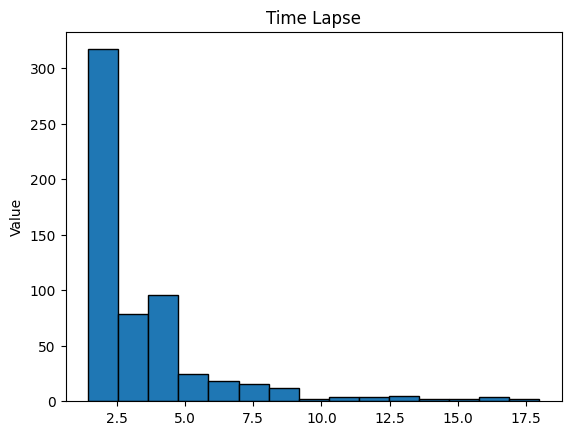

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
numbers = time_lapse_df.query('time_lapse < 20')['time_lapse'].values
print(f'total N: {len(numbers)}\nmean: {numbers.mean():.2f}, median: {np.median(numbers):.2f}\nmin: {numbers.min():.2f}, max: {numbers.max():.2f}')
plt.hist(numbers, bins=15, edgecolor='black')

# Add labels and title
plt.xlabel('')
plt.ylabel('Value')
plt.title('Time Lapse')

# Show the plot
plt.show()
